In [1]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries

In [78]:
!pip install flask

In [2]:
def save_dataset(symbol):
    api_key = 'P33J9T7IVI663Y0A'

    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol, outputsize='full')

    data.to_csv(f'./DataOutput/{symbol}_daily.csv')
    print (data.head ())
    print (f'./DataOutput/{symbol}_daily.csv')

In [3]:
def csv_to_dataset_openclose(csv_path):
    data = pd.read_csv(csv_path)
    dateList = []
    yList = []
    row_count = len(data['1. open'])

    for i in range (row_count):
      dateList.append (str(data.date[i]) + ' 09:30:00')
      dateList.append (str(data.date[i]) + ' 16:00:00')
      yList.append (data['1. open'][i])
      yList.append (data['4. close'][i])

      data_openclose = pd.DataFrame ({'ds':dateList,'y':yList})
    
    data_volume = data.drop (["1. open",  "2. high",   "3. low",  "4. close"], axis=1)
    data_volume.rename (columns = {"date": "ds", "5. volume": "y"}, inplace = True)

    data_high = data.drop (["1. open",  "5. volume",   "3. low",  "4. close"], axis=1)
    data_high.rename (columns = {"date": "ds", "2. high": "y"}, inplace = True)    
    
    data_low = data.drop (["1. open",  "5. volume",   "2. high",  "4. close"], axis=1)
    data_low.rename (columns = {"date": "ds", "3. low": "y"}, inplace = True)    
    
    return data,data_openclose, data_volume, data_high, data_low

In [4]:
save_dataset('AC')

            1. open  2. high   3. low  4. close  5. volume
date                                                      
2021-03-19  35.8400  38.1300  35.2506     37.15    58352.0
2021-03-18  36.3700  36.6300  35.8450     36.26    17318.0
2021-03-17  35.9500  37.0339  35.9000     36.50    14375.0
2021-03-16  36.7100  37.4000  36.0300     36.30    13363.0
2021-03-15  36.5265  36.8900  36.0600     36.63    20092.0
./DataOutput/AC_daily.csv


In [5]:
def csv_to_dataset_volume(csv_path):
    data = pd.read_csv(csv_path)

    return data

In [6]:
data,data_openclose, data_volume, data_high, data_low = csv_to_dataset_openclose('./DataOutput/AC_daily.csv')

In [7]:
print (data_openclose.head ())
print (data_volume.head ())
print (data_high.head ())
print (data_low.head ())

                    ds      y
0  2021-03-19 09:30:00  35.84
1  2021-03-19 16:00:00  37.15
2  2021-03-18 09:30:00  36.37
3  2021-03-18 16:00:00  36.26
4  2021-03-17 09:30:00  35.95
           ds        y
0  2021-03-19  58352.0
1  2021-03-18  17318.0
2  2021-03-17  14375.0
3  2021-03-16  13363.0
4  2021-03-15  20092.0
           ds        y
0  2021-03-19  38.1300
1  2021-03-18  36.6300
2  2021-03-17  37.0339
3  2021-03-16  37.4000
4  2021-03-15  36.8900
           ds        y
0  2021-03-19  35.2506
1  2021-03-18  35.8450
2  2021-03-17  35.9000
3  2021-03-16  36.0300
4  2021-03-15  36.0600


In [8]:
model_openclose = Prophet(daily_seasonality=True)
model_volume = Prophet(daily_seasonality=True)
model_high = Prophet(daily_seasonality=True)
model_low = Prophet(daily_seasonality=True)

model_openclose.fit(data_openclose)
model_volume.fit(data_volume)
model_high.fit(data_high)
model_low.fit(data_low)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [9]:
data_openclose.describe()

,y
count,2668.000000
mean,35.845595
std,3.976551
min,25.080000
25%,33.900000
50%,35.900000
75%,38.250000
max,64.900000


In [10]:
future_openclose_df = model_openclose.make_future_dataframe(periods=90)
future_volume_df = model_volume.make_future_dataframe(periods=90)
future_high_df = model_high.make_future_dataframe(periods=90)
future_low_df = model_low.make_future_dataframe(periods=90)

In [11]:
predictions_openclose = model_openclose.predict(future_openclose_df)
predictions_volume = model_volume.predict(future_volume_df)
predictions_high = model_high.predict(future_high_df)
predictions_low = model_low.predict(future_low_df)

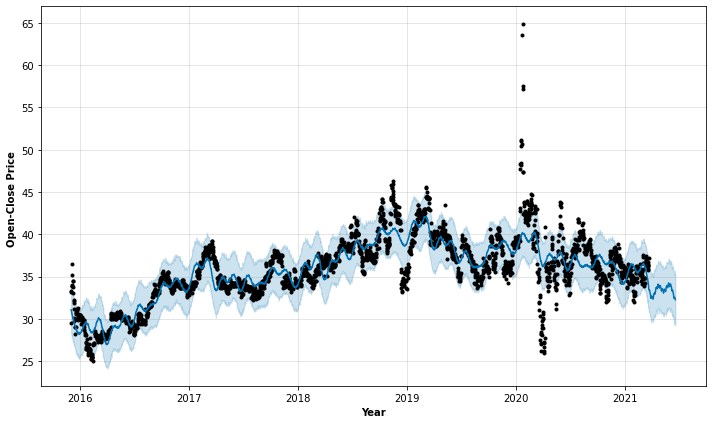

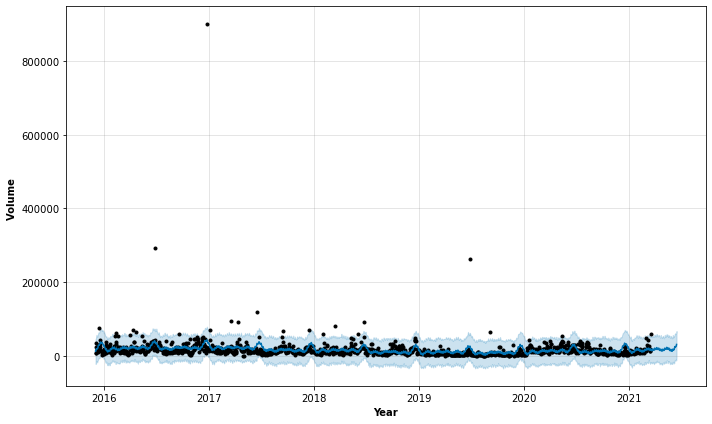

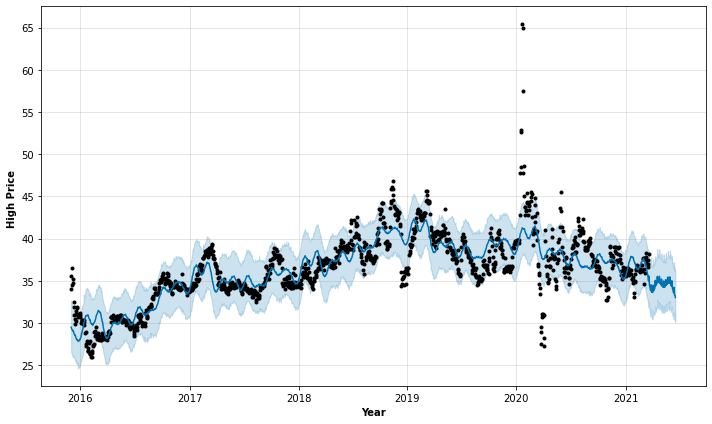

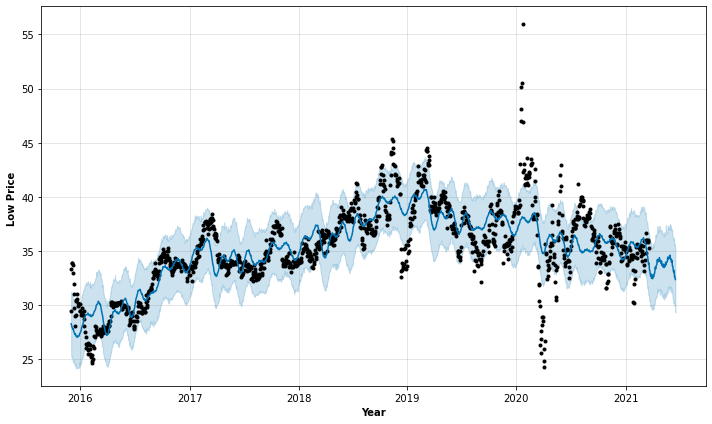

In [77]:
ax =model_openclose.plot(predictions_openclose)
plt.ylabel("Open-Close Price ", rotation='vertical', weight='bold')
plt.xlabel("Year",weight='bold')
plt.savefig("./DataOutput/AC_Open_Close.png")

model_volume.plot(predictions_volume)
plt.ylabel("Volume ", rotation='vertical', weight='bold')
plt.xlabel("Year",weight='bold')
plt.savefig("./DataOutput/AC_Volume.png")

model_high.plot(predictions_high)
plt.ylabel("High Price ", rotation='vertical', weight='bold')
plt.xlabel("Year",weight='bold')
plt.savefig("./DataOutput/AC_HighPrice.png")

model_low.plot(predictions_low)
plt.ylabel("Low Price ", rotation='vertical', weight='bold')
plt.xlabel("Year",weight='bold')
plt.savefig("./DataOutput/AC_LowPrice.png")

plt.show()

In [17]:
stock=data.copy()

In [18]:
stock.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2021-03-19,35.8400,38.1300,35.2506,37.15,58352.0
1,2021-03-18,36.3700,36.6300,35.8450,36.26,17318.0
2,2021-03-17,35.9500,37.0339,35.9000,36.50,14375.0
3,2021-03-16,36.7100,37.4000,36.0300,36.30,13363.0
4,2021-03-15,36.5265,36.8900,36.0600,36.63,20092.0


In [19]:
stock.rename(columns={'date': 'Date',
                        '1. open': 'Open',
                       '2. high': 'High',
                        '3. low': 'Low',
                        '4. close': 'Close',
                        '5. volume': 'Volume'}, inplace=True)

In [20]:
stock.head()

,Date,Open,High,Low,Close,Volume
0,2021-03-19,35.8400,38.1300,35.2506,37.15,58352.0
1,2021-03-18,36.3700,36.6300,35.8450,36.26,17318.0
2,2021-03-17,35.9500,37.0339,35.9000,36.50,14375.0
3,2021-03-16,36.7100,37.4000,36.0300,36.30,13363.0
4,2021-03-15,36.5265,36.8900,36.0600,36.63,20092.0


In [23]:
#percent change
# stock['high-low_pct']=(stock['High']-stock['Low']).pct_change()
#moving average
stock['ma_5']=stock['Close'].ewm(span=5).mean().shift(periods=1)
#std dev of the price over the past 5 days (how volitile the stock is)
stock['price_std_5']=stock['Close'].rolling(center=False, window=5).std().shift(periods=1)
#daily volume percent change
stock['volume_change_pct']=stock['Volume'].pct_change()
#Average Volume for th past 5 days
stock['volume_avg_5']=stock['Volume'].rolling(center=False, window=5).mean().shift(periods=1)
# stock['volume Close']=stock['Volume'].rolling(center=False,window=5).std().shift(periods=1)

In [24]:
stock.head(10)

,Date,Open,High,Low,Close,Volume,ma_5,price_std_5,volume_change_pct,volume_avg_5
0,2021-03-19,35.8400,38.1300,35.2506,37.15,58352.0,NaN,NaN,NaN,NaN
1,2021-03-18,36.3700,36.6300,35.8450,36.26,17318.0,37.150000,NaN,-0.703215,NaN
2,2021-03-17,35.9500,37.0339,35.9000,36.50,14375.0,36.616000,NaN,-0.169939,NaN
3,2021-03-16,36.7100,37.4000,36.0300,36.30,13363.0,36.561053,NaN,-0.070400,NaN
4,2021-03-15,36.5265,36.8900,36.0600,36.63,20092.0,36.452615,NaN,0.503555,NaN
5,2021-03-12,37.0600,37.1000,35.8800,36.29,28081.0,36.520711,0.358427,0.397621,24700.0
6,2021-03-11,37.0100,37.7700,36.0200,36.81,24095.0,36.436406,0.161648,-0.141947,18645.8
7,2021-03-10,36.6500,38.3400,36.6500,37.45,20649.0,36.568679,0.221878,-0.143017,20001.2
8,2021-03-09,34.8700,37.4100,34.8700,36.77,21657.0,36.874381,0.476319,0.048816,21256.0
9,2021-03-08,34.2100,35.8799,34.2100,34.79,42383.0,36.838658,0.421900,0.957012,22914.8


In [25]:
stock_refined=stock.dropna()

In [26]:
stock_refined.head(10)

,Date,Open,High,Low,Close,Volume,ma_5,price_std_5,volume_change_pct,volume_avg_5
5,2021-03-12,37.06,37.1000,35.88,36.29,28081.0,36.520711,0.358427,0.397621,24700.0
6,2021-03-11,37.01,37.7700,36.02,36.81,24095.0,36.436406,0.161648,-0.141947,18645.8
7,2021-03-10,36.65,38.3400,36.65,37.45,20649.0,36.568679,0.221878,-0.143017,20001.2
8,2021-03-09,34.87,37.4100,34.87,36.77,21657.0,36.874381,0.476319,0.048816,21256.0
9,2021-03-08,34.21,35.8799,34.21,34.79,42383.0,36.838658,0.421900,0.957012,22914.8
10,2021-03-05,33.89,34.6100,33.70,34.29,30364.0,36.143721,1.001159,-0.283581,27373.0
11,2021-03-04,35.92,36.4200,33.15,34.09,49964.0,35.518587,1.390798,0.645501,27829.6
12,2021-03-03,36.64,37.6500,35.94,35.94,19871.0,35.038692,1.530464,-0.602294,33003.4
13,2021-03-02,37.33,37.6700,35.51,36.57,13671.0,35.340680,1.144325,-0.312012,32847.8
14,2021-03-01,34.75,37.5200,34.75,37.52,16189.0,35.751862,1.076141,0.184186,31250.6


In [27]:
stock_refined['Date'].max()

'2021-03-12'

In [28]:
from datetime import datetime

In [29]:
from sklearn.linear_model import LinearRegression

In [35]:
stock_refined_train=stock_refined[stock_refined['Date']<str(datetime(2020, 7, 1))]

In [36]:
stock_refined_train

,Date,Open,High,Low,Close,Volume,ma_5,price_std_5,volume_change_pct,volume_avg_5
180,2020-07-01,37.370,37.5500,35.460,35.46,11969.0,37.434618,0.895505,0.374799,16540.8
181,2020-06-30,35.095,36.8900,35.070,36.69,18915.0,36.776412,1.282770,0.580333,15682.2
182,2020-06-29,33.050,36.5050,33.050,36.01,29706.0,36.747608,1.180466,0.570500,16552.8
183,2020-06-26,34.590,34.5900,32.511,32.80,29302.0,36.501739,0.967280,-0.013600,16013.8
184,2020-06-25,34.400,35.3100,34.080,34.69,13706.0,35.267826,1.526182,-0.532250,19719.6
...,...,...,...,...,...,...,...,...,...,...
1329,2015-12-07,33.740,34.7500,33.740,34.48,20212.0,31.543956,1.841991,1.079210,28716.2
1330,2015-12-04,33.900,34.4900,33.900,33.99,7694.0,32.522637,1.683458,-0.619335,17719.2
1331,2015-12-03,36.510,36.5100,33.870,33.91,9266.0,33.011758,1.339392,0.204315,13182.4
1332,2015-12-02,33.330,35.5300,33.330,35.21,35111.0,33.311172,0.944548,2.789229,11965.8


In [72]:
stock_refined_test=stock_refined[stock_refined['Date']>=str(datetime(2020, 7, 1))]

In [73]:
stock_refined_test

,Date,Open,High,Low,Close,Volume,ma_5,price_std_5,volume_change_pct,volume_avg_5
5,2021-03-12,37.06,37.1000,35.88,36.29,28081.0,36.520711,0.358427,0.397621,24700.0
6,2021-03-11,37.01,37.7700,36.02,36.81,24095.0,36.436406,0.161648,-0.141947,18645.8
7,2021-03-10,36.65,38.3400,36.65,37.45,20649.0,36.568679,0.221878,-0.143017,20001.2
8,2021-03-09,34.87,37.4100,34.87,36.77,21657.0,36.874381,0.476319,0.048816,21256.0
9,2021-03-08,34.21,35.8799,34.21,34.79,42383.0,36.838658,0.421900,0.957012,22914.8
...,...,...,...,...,...,...,...,...,...,...
175,2020-07-09,38.06,39.2000,37.09,38.19,16262.0,38.100379,0.947328,1.081936,21190.6
176,2020-07-08,38.02,38.9500,37.57,38.09,14562.0,38.130253,0.830271,-0.104538,18302.6
177,2020-07-07,37.50,38.8750,36.81,38.18,32401.0,38.116835,0.432470,1.225038,13305.4
178,2020-07-06,36.47,38.2200,36.36,38.00,10773.0,38.137890,0.338866,-0.667510,17278.4


In [74]:
dates_test=stock_refined_test['Date']
date_train=stock_refined_train['Date']

In [70]:
import datetime as dt
stock_refined_train['Date_ordinal'] = pd.to_datetime(stock_refined_train['Date'])
stock_refined_train['Date_ordinal']=stock_refined_train['Date_ordinal'].map(dt.datetime.toordinal)
date_train=stock_refined_train['Date_ordinal']
date_train.shape

<ipython-input-70-5e3652e523ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_refined_train['Date_ordinal'] = pd.to_datetime(stock_refined_train['Date'])
<ipython-input-70-5e3652e523ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_refined_train['Date_ordinal']=stock_refined_train['Date_ordinal'].map(dt.datetime.toordinal)


(1154,)

In [75]:
X_train=stock_refined_train[[ 'Open', 'High', 'Low',
        'Volume', 'ma_5', 'price_std_5',
        'volume_change_pct', 'volume_avg_5']]
Y_train=stock_refined_train[['Close']]

In [76]:
lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [56]:
X_test=stock_refined_test[['Open', 'High', 'Low',
         'Volume', 'ma_5', 'price_std_5',
        'volume_change_pct', 'volume_avg_5']]
Y_test=stock_refined_test[['Close']]
close_predictions=lr.predict(X_test)
mae=sum(abs(close_predictions-Y_test.values))/Y_test.shape[0]

In [49]:
mae

array([0.37245675])

In [52]:
close_predictions

array([[36.12279751],
       [36.77088728],
       [37.88647653],
       [36.93345462],
       [35.65492545],
       [34.41879623],
       [34.17249813],
       [36.68025488],
       [36.01437109],
       [36.88530673],
       [34.96659701],
       [35.83716436],
       [36.31661516],
       [35.21611095],
       [36.23690988],
       [35.97535368],
       [35.47211634],
       [35.65167284],
       [35.83749761],
       [35.89215131],
       [35.73257659],
       [36.06535168],
       [35.25690129],
       [36.1541973 ],
       [35.67340821],
       [36.12542772],
       [35.54730497],
       [34.65339996],
       [34.3349346 ],
       [31.11446745],
       [33.32339413],
       [31.65199665],
       [34.64311649],
       [35.01315592],
       [34.93551985],
       [34.78271024],
       [34.85130679],
       [34.73384477],
       [35.91797897],
       [35.38843237],
       [34.63884861],
       [35.4641577 ],
       [35.6420373 ],
       [35.85334297],
       [35.96514336],
       [34

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Predicted Closing')

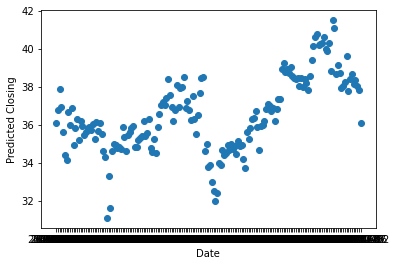

In [54]:
plt.scatter(dates, close_predictions)
plt.xlabel("Date")
plt.ylabel("Predicted Closing")

In [53]:
print(mae)
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

[0.37245675]
0.99175424375363
0.9372011031344787
